In [369]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline


from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

M = 1053.19/1000.0
m = 6.856*10**(-6)

In [372]:
#Time Stamp (Seconds),Comment (),System Status (Code),Puck Temp (Kelvin),System Temp (Kelvin),Field (Oersted),Pressure (Torr),Sample Temp (Kelvin),Temp Rise (Kelvin),Samp HC (µJ/K),Samp HC Err (µJ/K),Addenda HC (µJ/K),Addenda HC Err (µJ/K),Total HC (µJ/K),Total HC Err (µJ/K),Fit Deviation (ChiSquare),Time Const tau1 (seconds),Time Const tau2 (seconds),Sample Coupling (Percent),Debye Temp (Kelvin),Debye Temp Err (Kelvin),Cal Correction (Factor),Therm Resist (Ohms),Htr Resist (Ohms),Puck Resist (Ohms),Wire Cond (W/K),Meas Time (seconds),Temp Squared (K^2),Samp HC/Temp (µJ/K/K),Addenda Offset HC (µJ/K)

Ti = np.genfromtxt('NdTiGaO_multifield_He3Base._50K.dat',delimiter=',',skip_header=16)
SH = Ti[:,9]*10**(-6)*M/m
temp = Ti[:,7]
field = Ti[:,5]

#print(SH)


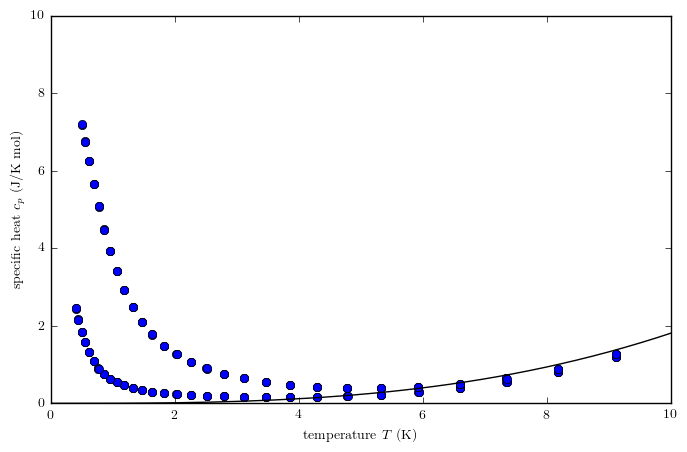

In [383]:
SH_standard = SH[field<1]
temp_standard = temp[field<1]

def fit_SH(T,A,B,C):
    return A*T*T*T + B*T*T*T*T*T + C*T*T*T*T*T*T*T
p0 = [5,4,3]
t = 40
popt, pcov = curve_fit(fit_SH, temp_standard[temp_standard>t], SH_standard[temp_standard>t], p0)
perr = np.sqrt(np.diag(pcov))
a,b,c=popt

x = np.linspace(-1, 50., 200)
#plt.plot(temp[field<21000], SH[field<21000], 'yo')
#plt.plot(temp[field<16000], SH[field<16000], 'ro')
plt.plot(temp[field<6000], SH[field<6000], 'bo')
#plt.plot(temp[field<1], SH[field<1], 'go')
plt.plot(x, fit_SH(x,a,b,c), 'black')
plt.xlabel("temperature $T$ (K)")
plt.ylabel("specific heat $c_p$ (J/K mol)")
plt.rcParams["figure.figsize"] = [8,5]

#plt.legend(bbox_to_anchor=(0.5, 0.94), loc=2, borderaxespad=0.)
axes = plt.gca()
axes.set_xlim([0,10])
axes.set_ylim([0,10])
plt.show()
plt.close()


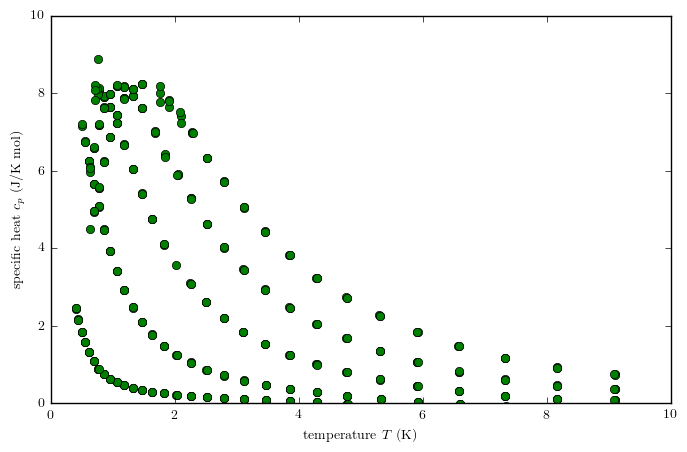

In [384]:
yikes = SH - fit_SH(temp,a,b,c)
#plt.plot(temp, SH, 'go')
plt.plot(temp, yikes, 'go')
#plt.plot(t, s, 'go')
plt.xlabel("temperature $T$ (K)")
plt.ylabel("specific heat $c_p$ (J/K mol)")
plt.rcParams["figure.figsize"] = [8,5]

#plt.plot(temp[field<21000], yikes[field<21000], 'go')
#plt.plot(temp[field<16000], yikes[field<16000], 'ro')
#plt.plot(temp[field<11111], yikes[field<11111], 'bo')
#plt.plot(temp[field<6000], yikes[field<6000], 'yo')
#plt.plot(temp[field<1], yikes[field<1], 'go')
#plt.legend(bbox_to_anchor=(0.5, 0.94), loc=2, borderaxespad=0.)
axes = plt.gca()
axes.set_xlim([0,10])
axes.set_ylim([0,10])
plt.show()
plt.close()


In [385]:
A = np.argwhere(field<1)
a1,a2=(np.min(A),np.max(A))
B = np.argwhere(np.logical_and(field>1,field<5000))
b1,b2=(np.min(B),np.max(B))
C = np.argwhere(np.logical_and(field>7000,field<11000))
c1,c2=(np.min(C),np.max(C))
D = np.argwhere(np.logical_and(field>11000,field<15000))
d1,d2=(np.min(D),np.max(D))
E = np.argwhere(np.logical_and(field>17000,field<21000))
e1,e2=(np.min(E),np.max(E))

print(a1,a2)
print(b1,b2)
print(c1,c2)
print(d1,d2)
print(e1,e2)

0 136
138 267
268 393
394 516
520 643


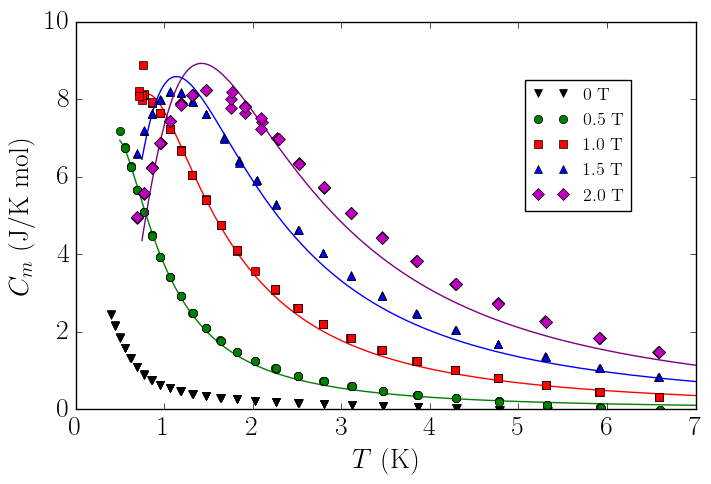

In [490]:
plt.rcParams.update({'font.size': 20})

x = np.linspace(0.5, 10, 400)
plt.plot(temp[a1:a2], SH[a1:a2]-fit_SH(temp[a1:a2],a,b,c), 'ko', marker='v', label='0 T')

plt.plot(x, SA(x,B1,B2), 'green')
plt.plot(temp[b1:b2], SH[b1:b2]-fit_SH(temp[b1:b2],a,b,c), 'go', marker='o', label='0.5 T')

x = np.linspace(0.75, 10, 400)
plt.plot(x, SA(x,C1,C2), 'red')
plt.plot(temp[c1:c2], SH[c1:c2]-fit_SH(temp[c1:c2],a,b,c), 'ro', marker='s', label='1.0 T')

plt.plot(x, SA(x,D1,D2), 'blue')
plt.plot(temp[d1:d2], SH[d1:d2]-fit_SH(temp[d1:d2],a,b,c), 'bo', marker='^', label='1.5 T')

plt.plot(x, SA(x,E1,E2), 'purple')
plt.plot(temp[e1:e2], SH[e1:e2]-fit_SH(temp[e1:e2],a,b,c), 'mo', marker='D', label='2.0 T')

plt.legend(bbox_to_anchor=(0.725, 0.85), fontsize=13, loc=2, borderaxespad=0.)
plt.rcParams["figure.figsize"] = [8,5]
#plt.plot(temp_e[temp_e<10], SH_e[temp_e<10], 'bo')
#plt.plot(x, schottky(x,ay,d))
#plt.plot(temp[138:267], SH[138:267], 'bo')
plt.xlabel("$T$ (K)")
plt.ylabel("$C_m$ (J/K mol)")
axes = plt.gca()
axes.set_xlim([0,7])
axes.set_ylim([0,10])
fig1 = plt.gcf()
fig1.savefig('NTGO_SH.eps')
#plt.draw()
#plt.show()
#plt.close()

In [460]:
temp_a=temp[b1:b2]
SH_a=SH[b1:b2]-fit_SH(temp_a,a,b,c)

#SH - fit_SH(temp,a,b,c)

#D=0.403
#A=19
def SA(x,A,D):
    return A*((D/x)**2)*np.exp(D/x)/(1+np.exp(D/x))**2
p0 = [10,0.5]
popt, pcov = curve_fit(SA, temp_a[temp_a<10], SH_a[temp_a<10], p0)
perr = np.sqrt(np.diag(pcov))
residuals = SH_a[temp_a<10] - SA(temp_a[temp_a<10], *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((SH_a[temp_a<10]-np.mean(SH_a[temp_a<10]))**2)
r_squared = 1 - (ss_res / ss_tot)
#parameters of fit
print(r_squared)
print(popt)

B1,B2 = popt
#C1,C2 = popt
#D1,D2 = popt
#E1,E2 = popt

0.997874098086
[ 15.87541423   1.13062844]
